In [3]:
import os
import requests
import json
import pandas as pd
import csv
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#Get Live data in JSON format

In [5]:
try:
    URL ='https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=1000&aggregate=3&e=CCCAGG'
#     URL = 'https://min-api.cryptocompare.com/data/histohour?fsym=BTC&tsym=USD&limit=10000'
    response = requests.get(URL)
    if response.status_code == 200:
        json_response = response.json()
        crc_data = json_response['Data']
        print (crc_data)
    else:
        print ("Error")
except Exception as e:
    print ("Error")

[{u'volumeto': 588757.1, u'high': 10.9, u'low': 10.4, u'time': 1351900800, u'volumefrom': 55260.02, u'close': 10.75, u'open': 10.47}, {u'volumeto': 924546.75, u'high': 11.22, u'low': 10.67, u'time': 1352160000, u'volumefrom': 84788, u'close': 10.93, u'open': 10.75}, {u'volumeto': 442782.2, u'high': 10.98, u'low': 10.7, u'time': 1352419200, u'volumefrom': 40843.05, u'close': 10.87, u'open': 10.93}, {u'volumeto': 884086.1, u'high': 11.18, u'low': 10.77, u'time': 1352678400, u'volumefrom': 80517.77, u'close': 10.95, u'open': 10.87}, {u'volumeto': 1245817.82, u'high': 11.8, u'low': 10.86, u'time': 1352937600, u'volumefrom': 109259.78, u'close': 11.79, u'open': 10.95}, {u'volumeto': 795268.98, u'high': 11.84, u'low': 11.57, u'time': 1353196800, u'volumefrom': 67932.25, u'close': 11.73, u'open': 11.79}, {u'volumeto': 1162262.54, u'high': 12.43, u'low': 11.64, u'time': 1353456000, u'volumefrom': 96497, u'close': 12.35, u'open': 11.73}, {u'volumeto': 985801.06, u'high': 12.65, u'low': 11.89, u

In [6]:
#Convert JSON data to CSV

In [7]:
filename = 'crc_day_history.csv'
try:
    os.remove(filename)
except OSError:
    pass
#Open a file for writing
crypto_currency_data = open(filename,'w/r')

#Create a csv writter object
csvwritter = csv.writer(crypto_currency_data)

count = 0

for cr in crc_data:
    if count ==0:
        header =cr.keys()
        csvwritter.writerow(header)
        count +=1
    csvwritter.writerow(cr.values())
    
crypto_currency_data.close()

In [8]:
#Reading CSV File

In [9]:
crypto_currency_file = open('crc_day_history.csv')
crypto_currency_csv = csv.reader(crypto_currency_file)

for row in crypto_currency_csv:
    print(row)
    
crypto_pd_obj = pd.read_csv(filename)

['volumeto', 'high', 'low', 'time', 'volumefrom', 'close', 'open']
['588757.1', '10.9', '10.4', '1351900800', '55260.02', '10.75', '10.47']
['924546.75', '11.22', '10.67', '1352160000', '84788', '10.93', '10.75']
['442782.2', '10.98', '10.7', '1352419200', '40843.05', '10.87', '10.93']
['884086.1', '11.18', '10.77', '1352678400', '80517.77', '10.95', '10.87']
['1245817.82', '11.8', '10.86', '1352937600', '109259.78', '11.79', '10.95']
['795268.98', '11.84', '11.57', '1353196800', '67932.25', '11.73', '11.79']
['1162262.54', '12.43', '11.64', '1353456000', '96497', '12.35', '11.73']
['985801.06', '12.65', '11.89', '1353715200', '79507.9', '12.25', '12.35']
['1108145.7', '12.6', '11.9', '1353974400', '90388.24', '12.45', '12.25']
['666687.06', '12.69', '12.42', '1354233600', '53058.66', '12.5', '12.45']
['1555848.96', '13.5', '12.48', '1354492800', '119800.25', '13.38', '12.5']
['1238201.58', '13.69', '12.9', '1354752000', '92533.62', '13.42', '13.38']
['1082442.85', '13.67', '13.02', '1

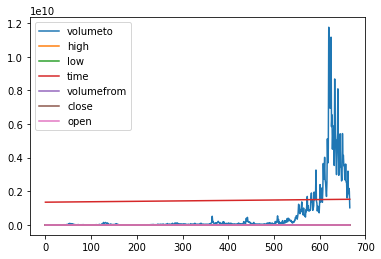

In [10]:
crypto_pd_obj.plot()

In [11]:
crc_pred = crypto_pd_obj[['open','close']]
print(crc_pred.tail())

        open    close
662  6977.04  8022.51
663  8022.51  7921.63
664  7921.65  8877.08
665  8877.15  8968.25
666  8967.86  9453.10


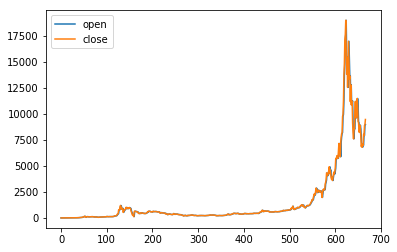

In [12]:
crc_pred.plot()

In [24]:
forecast_out = int(1) # predicting 30 days into future
crc_pred['Prediction'] = crc_pred[['open']].shift(-forecast_out) #  label column with data shifted 30 units up

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
X = np.array(crc_pred.drop(['Prediction'], 1))
X = preprocessing.scale(X)

In [26]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

In [27]:
y = np.array(crc_pred['Prediction'])
y = y[:-forecast_out]

In [28]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [29]:
# Training

In [30]:
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
# Testing

In [32]:
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

('confidence: ', 0.9999999952882619)


In [33]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[9452.5923007]


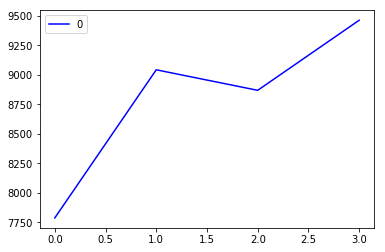

In [23]:
pd.DataFrame(forecast_prediction).plot(color="blue")